This program uses GraphSage to attempt to graph the GrapSAGE embeddings of just the known promtoers and inhibitors. It was found that the graphing and clustering was not meaningful and the novel molecules must be included for meaningful graphing of the embeddings to be done. 

# Getting graph from corpus
---



# Loading in all Sentences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Extracted Sentences/"

In [ ]:
import json

In [ ]:
with open(MODEL_PATH + "all_years_array.json", "r") as f:
    all_docs = json.load(f)

In [ ]:
len(all_docs)

700

In [ ]:
all_docs_1D = [j for sub in all_docs for j in sub]

In [ ]:
len(all_docs_1D)

755496

In [ ]:
keyword = "pten"
found_sentences = [] 

for sentence in all_docs_1D:
  if keyword in sentence:
    found_sentences.append(sentence)

In [ ]:
len(found_sentences)

660

# Defining Molecules and Labels

In [ ]:
molecules = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
molecules_double_spaced = [" " + m + " " for m in molecules]
print(molecules_double_spaced)

[' netrin ', ' ephrin ', ' laminin ', ' tenascin ', ' cspg ', ' zymosan ', ' camp ', ' pten ', ' cntf ', ' lif ', ' oncomodulin ', ' stat3 ', ' socs3 ', ' rhoa ', ' rock ', ' y27632 ', ' nogo ', ' klf ', ' ngr ', ' lar ', ' tlr2 ', ' bdnf ', ' igf1 ', ' opn ', ' mag ', ' omgp ', ' kspg ', ' taxol ']


In [ ]:
molecule_labels = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1] 
len(molecules) == len(molecule_labels)
node_colors = ["green" if x==1 else "red" for x in molecule_labels]

In [ ]:
import gensim 

MODEL_PATH_ALL = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/WordEmbeddings/Models/Gensim_Lemmatized_All_Docs/"
model_all_years = gensim.models.KeyedVectors.load(MODEL_PATH_ALL + "{}.wordvectors".format("All Papers"), mmap='r')
wordvec = model_all_years

molecules_embedded = [wordvec[m] for m in molecules]

In [ ]:
def make_edges_from_dict(graph_dict):
  edges = [] 
  for molecule, assoc in graph_dict.items():
    for m in assoc:
        edges.append((molecule.strip(), m.strip()))

  
  return edges

In [ ]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

def create_networkx_graph(edges, molecules=molecules, molecules_embedded=molecules_embedded):
  figure(figsize=(18, 14), dpi=80)

  G = nx.Graph()
  G.add_nodes_from(molecules, v=molecules_embedded)
  G.add_edges_from(edges)
  nx.draw(G)

In [ ]:
from pyvis.network import Network

# Can't yet use embeddings for value attribute of pyvis graph
def create_pyvis_graph(edges, filename, molecules_arr=molecules, molecules_embedded=molecules_embedded, colors_arr=node_colors):
  nt = Network('1000px', '1000px')
  # populates the nodes and edges data structures
  nt.add_nodes(molecules_arr, color=node_colors)
  # nt.add_nodes(molecules_arr, value=molecules_embedded, color=node_colors)

  nt.add_edges(edges)
  nt.show("{}.html".format(filename))
  print("Now open {}.html".format(filename))

In [ ]:
# TODO for nodes: 
## Use paragraphs, Use documents 
## Try with different than two spaces padding it 
## Add all molecules 
## Use Word2Vec Similarity - DONE 
## Use word embeddings - DONE 

## TODO for edges:
# strength of link using regeneration scores from combined y hats of BERT model for each sentence
# strength of link using regeneration scores from combined sum of causal verbs in each sentence - DONE
# strength of link from amount of vector similarity - DONE 

# Creating Graph from Same Sentence

In [ ]:
# Let's do by same sentence first 
all_docs_1D[100:110]

['april 19th, i divided the spinal marrow of a dog, between the last vertebra of the neck and first of the back.',
 'the muscles of the trunk of the body, but particularly those of the hind legs, appeared instantly relaxed; the legs continued supple, like those of an animal killed by electricity.',
 'the heart, on performing the operation, ceased for a stroke or two, then went on slow and full, and in about a q\\.tarter of an hour after, the pulse was 160 in a minute.',
 'respiration was performed by means of the diaphragm only, which acted very strongly for some hours.',
 'the operation was performed about a quarter of an hour before twelve at noon; about four in the afternoon the pulse was ninety only in a minute, and the heat of the body exceedingly abated, the diaphragm acting strongly, but irre\xad gularly.',
 'about seven in the evening, the pulse was not above twenty in a minute, the diaphragm acting strongly, but in re\xad peated jerks.',
 'between twelve at night and one in th

In [ ]:
!pip install scispacy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_craft_md-0.5.1.tar.gz
# pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_jnlpba_md-0.4.0.tar.gz
# pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz (125.1 MB)
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 104, in resolve
    req, requested_extras=()
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/factory.py", line 434, in make_requirem

In [ ]:
import spacy
import scispacy 
# import en_ner_craft_md
# import en_ner_bc5cdr_md
# import en_ner_jnlpba_md
import en_ner_bionlp13cg_md


In [ ]:
all_docs_1_sentence = ' '.join(all_docs_1D)

In [ ]:
# nlp_cr = en_ner_craft_md.load()
# cr_label = "ggp" 
# cr_label_two = "chebi"

# nlp_bc = en_ner_bc5cdr_md.load()
label = "gene_or_gene_product"
nlp_bi = en_ner_bionlp13cg_md.load()
# nlp_jn = en_ner_jnlpba_md.load()

KeyboardInterrupt: ignored

In [ ]:
import math 
import pickle 

molecules_NER = [] 

chunk_length = 1_000_000
num_iterations = math.ceil(len(all_docs_1_sentence) / chunk_length)
start_idx = 0 
counter = 0

while counter < num_iterations:
    print(f'Chunk {counter}/{num_iterations}...')
    chunk = all_docs_1_sentence[start_idx:start_idx + chunk_length]
    if counter == num_iterations - 1:     # final chunk 
      chunk = all_docs_1_sentence[start_idx:len(all_docs_1_sentence) - 1]

    doc = nlp_bi(chunk) 
    for ent in doc.ents:
      if ent.label_.lower() == label:
        molecules_NER.append(ent.text) 
        print(f'--> {ent.text}') 

    start_idx = start_idx + chunk_length
    counter += 1

    # Save after each chunk bc you don't know when RAM will run out 
    NER = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bionlp13cg.pkl"
    with open(NER, 'wb') as f:
      pickle.dump(molecules_NER, f)

    # manually create space 
    del doc 

Chunk 0/49...


NameError: ignored

In [ ]:
graph_dict_sentence = {} 
for molecule in molecules_double_spaced:
  graph_dict_sentence[molecule.strip()] = set()

counter = 0
for sentence in all_docs_1D:
  molecules_in_sentence = [] 
  for molecule in molecules_double_spaced:
    if molecule in sentence:
      molecules_in_sentence.append(molecule.strip())
  
  for found_molecule in molecules_in_sentence:
    to_add = molecules_in_sentence
    to_add.remove(found_molecule)
    if to_add != []:
      print("---")
      print(sentence)
      print(to_add) 
    molec_assoc = graph_dict_sentence[found_molecule]
    molec_assoc.update(to_add)
    graph_dict_sentence[found_molecule] = molec_assoc

  # counter += 1
  # if counter == 10000:
  #   break

print(graph_dict_sentence)

---
such an indirect mechanism might involve a growth factor-induced production of cell adhesion molecules (56), ecm receptors (integrins and nonintegrins) (57), ecm components (58), ecm components containing egf-like do- mains, e.g., laminin (59), tenascin (60), or thrombospondin (61), or other growth factors (56).
['tenascin']
---
this, taken together with the fact that the in vivo application of cntf or bdnf during ontogenetic motoneuron death does not rescue more than 20-30% of the neurons argues for a multifactorial control of motoneuron devel­ opment (wewetzer et al., 1990; oppenheim et al., 1991, 1992b).
['bdnf']
---
in the adult hypoglossal system the lesion-induced loss of chat-acitvity could be prevented by bdnf but not by cntf or fgf-2 (chiu et al., 1994; grothe and unsicker, 1992).
['bdnf']
---
the ecm compo­ nents tenascin and cs proteoglycans but also laminin col­ ocalize with regions of dense astrocytic processes and astrocytes immediately bordering the lesion (40, 86, 4

In [ ]:
print(graph_dict_sentence)

{'netrin': {'laminin'}, 'ephrin': set(), 'laminin': {'mag', 'cntf', 'cspg', 'bdnf', 'tenascin'}, 'tenascin': {'cspg', 'mag'}, 'cspg': {'omgp', 'mag', 'lar', 'rock', 'rhoa', 'nogo'}, 'zymosan': {'pten', 'camp', 'ngr'}, 'camp': {'pten', 'mag', 'lar', 'cntf', 'socs3', 'oncomodulin', 'bdnf', 'rhoa', 'stat3'}, 'pten': {'cntf', 'socs3', 'camp', 'bdnf', 'opn', 'stat3', 'nogo'}, 'cntf': {'socs3', 'lif', 'rock', 'oncomodulin', 'bdnf', 'stat3'}, 'lif': set(), 'oncomodulin': {'pten', 'bdnf'}, 'stat3': {'rhoa', 'cntf', 'socs3', 'bdnf'}, 'socs3': {'cntf', 'bdnf'}, 'rhoa': {'rock', 'lar', 'mag', 'nogo'}, 'rock': {'y27632', 'mag', 'omgp', 'lar', 'rhoa', 'nogo'}, 'y27632': set(), 'nogo': {'omgp', 'mag', 'lar', 'rock', 'ngr'}, 'klf': set(), 'ngr': {'omgp', 'mag'}, 'lar': {'nogo', 'bdnf'}, 'tlr2': set(), 'bdnf': {'mag', 'lar', 'cntf', 'oncomodulin', 'opn'}, 'igf1': set(), 'opn': set(), 'mag': {'omgp', 'lar', 'rhoa', 'nogo', 'ngr'}, 'omgp': {'mag', 'ngr'}, 'kspg': set(), 'taxol': set()}


In [ ]:
edges_sentence = make_edges_from_dict(graph_dict_sentence)

In [ ]:
edges_sentence

[('netrin', 'laminin'),
 ('laminin', 'mag'),
 ('laminin', 'cntf'),
 ('laminin', 'cspg'),
 ('laminin', 'bdnf'),
 ('laminin', 'tenascin'),
 ('tenascin', 'cspg'),
 ('tenascin', 'mag'),
 ('cspg', 'omgp'),
 ('cspg', 'mag'),
 ('cspg', 'lar'),
 ('cspg', 'rock'),
 ('cspg', 'rhoa'),
 ('cspg', 'nogo'),
 ('zymosan', 'pten'),
 ('zymosan', 'camp'),
 ('zymosan', 'ngr'),
 ('camp', 'pten'),
 ('camp', 'mag'),
 ('camp', 'lar'),
 ('camp', 'cntf'),
 ('camp', 'socs3'),
 ('camp', 'oncomodulin'),
 ('camp', 'bdnf'),
 ('camp', 'rhoa'),
 ('camp', 'stat3'),
 ('pten', 'cntf'),
 ('pten', 'socs3'),
 ('pten', 'camp'),
 ('pten', 'bdnf'),
 ('pten', 'opn'),
 ('pten', 'stat3'),
 ('pten', 'nogo'),
 ('cntf', 'socs3'),
 ('cntf', 'lif'),
 ('cntf', 'rock'),
 ('cntf', 'oncomodulin'),
 ('cntf', 'bdnf'),
 ('cntf', 'stat3'),
 ('oncomodulin', 'pten'),
 ('oncomodulin', 'bdnf'),
 ('stat3', 'rhoa'),
 ('stat3', 'cntf'),
 ('stat3', 'socs3'),
 ('stat3', 'bdnf'),
 ('socs3', 'cntf'),
 ('socs3', 'bdnf'),
 ('rhoa', 'rock'),
 ('rhoa', 'lar'

In [ ]:
create_pyvis_graph(edges_sentence, "same_sentence")

Now open same_sentence.html


# Creating Graph from Word Embedding Similarity

In [ ]:
print(model_all_years.most_similar("pten", topn=10))

[('deletion', 0.9459090232849121), ('overexpression', 0.9210734963417053), ('socs3', 0.9128459692001343), ('knockdown', 0.9029163122177124), ('mdm4', 0.8950291872024536), ('rhoa', 0.894497811794281), ('downregulation', 0.8859684467315674), ('s6k1', 0.8832250833511353), ('sac2', 0.8780266046524048), ('conditional', 0.8745607733726501)]


In [ ]:
num_to_check = 100

graph_dict_similarity = {}
for molecule in molecules:
  graph_dict_similarity[molecule] = set()
  for word_tuple in wordvec.most_similar(molecule, topn=num_to_check):
    word = word_tuple[0]
    if (word in molecules) and (word != molecule):
      molec_assoc = graph_dict_similarity[molecule]
      molec_assoc.add(word) 
      graph_dict_similarity[molecule] = molec_assoc

print(graph_dict_similarity)   

edges_similarity = make_edges_from_dict(graph_dict_similarity)

create_pyvis_graph(edges_similarity, "similarity_" + str(num_to_check))

{'netrin': {'ephrin'}, 'ephrin': {'netrin'}, 'laminin': {'cspg', 'tenascin'}, 'tenascin': {'netrin', 'lar', 'laminin', 'cspg', 'ephrin'}, 'cspg': {'laminin', 'lar', 'rock', 'tenascin'}, 'zymosan': {'cntf'}, 'camp': {'pten', 'lif', 'rock', 'rhoa', 'stat3'}, 'pten': {'cntf', 'socs3', 'camp', 'lif', 'rock', 'rhoa', 'stat3'}, 'cntf': {'pten', 'socs3', 'lif', 'camp', 'bdnf', 'zymosan', 'opn', 'rhoa'}, 'lif': {'cntf'}, 'oncomodulin': {'socs3', 'lif', 'tlr2'}, 'stat3': {'rhoa', 'socs3', 'camp'}, 'socs3': {'pten', 'cntf', 'camp', 'lif', 'rhoa', 'stat3'}, 'rhoa': {'pten', 'socs3', 'camp', 'rock', 'stat3'}, 'rock': {'rhoa'}, 'y27632': {'rock', 'taxol'}, 'nogo': {'pten', 'omgp', 'mag', 'lar', 'tenascin', 'cspg', 'ngr'}, 'klf': set(), 'ngr': {'opn'}, 'lar': {'cspg', 'tenascin', 'ngr'}, 'tlr2': set(), 'bdnf': {'opn', 'cntf', 'lif'}, 'igf1': set(), 'opn': set(), 'mag': {'omgp', 'lar', 'cspg', 'nogo', 'tenascin'}, 'omgp': set(), 'kspg': set(), 'taxol': set()}
Now open similarity_100.html


In [ ]:
graph_dict_similarity["socs3"]

{'camp', 'cntf', 'lif', 'pten', 'rhoa', 'stat3'}

In [ ]:
graph_dict_sentence["socs3"]

{'bdnf', 'cntf'}

In [ ]:
def get_edges_of_molecule(edges, molecule):
  edge_molecules = set()
  for edge in edges:
    if edge[0] == molecule or edge[1] == molecule:
      temp = list(edge)
      temp.remove(molecule)
      edge_molecules.add(temp[0])
  print(edge_molecules)

In [ ]:
get_edges_of_molecule(edges_similarity, "nogo") 
get_edges_of_molecule(edges_sentence, "nogo") 

{'pten', 'omgp', 'mag', 'lar', 'ngr', 'cspg', 'tenascin'}
{'pten', 'omgp', 'mag', 'lar', 'rock', 'cspg', 'rhoa', 'ngr'}


## Creating Strengths of Links

In [ ]:
from collections import defaultdict
num_to_check = 100

graph_dict_similarity_strength = {}
for molecule in molecules:
  graph_dict_similarity_strength[molecule] = {} 
  for word_tuple in wordvec.most_similar(molecule, topn=num_to_check):
    word = word_tuple[0]
    strength = word_tuple[1]
    if (word in molecules) and (word != molecule):
      graph_dict_similarity_strength[molecule][word] = strength

print(graph_dict_similarity_strength)   

# edges_similarity_strength = make_edges_from_dict(graph_dict_similarity_strength)

# create_pyvis_graph(edges_similarity_strength, "similarity_" + str(num_to_check))

{'netrin': {'ephrin': 0.9171923398971558}, 'ephrin': {'netrin': 0.9171923398971558}, 'laminin': {'cspg': 0.8026310205459595, 'tenascin': 0.7842304706573486}, 'tenascin': {'cspg': 0.8329286575317383, 'ephrin': 0.7861074209213257, 'laminin': 0.7842305302619934, 'lar': 0.756644606590271, 'netrin': 0.7545971870422363}, 'cspg': {'tenascin': 0.8329285383224487, 'laminin': 0.8026310205459595, 'rock': 0.7883099317550659, 'lar': 0.776393473148346}, 'zymosan': {'cntf': 0.7524269819259644}, 'camp': {'rhoa': 0.8853886127471924, 'rock': 0.8115652799606323, 'stat3': 0.8107894659042358, 'lif': 0.8068296909332275, 'pten': 0.8051338195800781}, 'pten': {'socs3': 0.9128459692001343, 'rhoa': 0.894497811794281, 'camp': 0.8051338195800781, 'cntf': 0.7947903871536255, 'stat3': 0.7924925684928894, 'rock': 0.7857073545455933, 'lif': 0.785008430480957}, 'cntf': {'bdnf': 0.9062888622283936, 'lif': 0.9000119566917419, 'pten': 0.7947903871536255, 'opn': 0.7937605381011963, 'socs3': 0.7704790830612183, 'camp': 0.75

In [ ]:
def make_edges_weights_from_dict(graph_dict):
  edges = {} 
  for molecule, assoc in graph_dict.items():
    for assoc_molecule, strength in assoc.items():
      edges[(molecule, assoc_molecule)] = strength 
  
  return edges

edges_similarity_strength = make_edges_weights_from_dict(graph_dict_similarity_strength)

In [ ]:
edges_similarity_strength

{('netrin', 'ephrin'): 0.9171923398971558,
 ('ephrin', 'netrin'): 0.9171923398971558,
 ('laminin', 'cspg'): 0.8026310205459595,
 ('laminin', 'tenascin'): 0.7842304706573486,
 ('tenascin', 'cspg'): 0.8329286575317383,
 ('tenascin', 'ephrin'): 0.7861074209213257,
 ('tenascin', 'laminin'): 0.7842305302619934,
 ('tenascin', 'lar'): 0.756644606590271,
 ('tenascin', 'netrin'): 0.7545971870422363,
 ('cspg', 'tenascin'): 0.8329285383224487,
 ('cspg', 'laminin'): 0.8026310205459595,
 ('cspg', 'rock'): 0.7883099317550659,
 ('cspg', 'lar'): 0.776393473148346,
 ('zymosan', 'cntf'): 0.7524269819259644,
 ('camp', 'rhoa'): 0.8853886127471924,
 ('camp', 'rock'): 0.8115652799606323,
 ('camp', 'stat3'): 0.8107894659042358,
 ('camp', 'lif'): 0.8068296909332275,
 ('camp', 'pten'): 0.8051338195800781,
 ('pten', 'socs3'): 0.9128459692001343,
 ('pten', 'rhoa'): 0.894497811794281,
 ('pten', 'camp'): 0.8051338195800781,
 ('pten', 'cntf'): 0.7947903871536255,
 ('pten', 'stat3'): 0.7924925684928894,
 ('pten', 'r

In [ ]:
# Can't yet use embeddings for value attribute of pyvis graph
def create_pyvis_graph_strength(edges, filename, molecules_arr=molecules, molecules_embedded=molecules_embedded, colors_arr=node_colors):
  nt = Network('1000px', '1000px')
  # populates the nodes and edges data structures
  nt.add_nodes(molecules_arr, color=node_colors)
  # nt.add_nodes(molecules_arr, value=molecules_embedded, color=node_colors)

  for link,strength in edges.items():
    nt.add_edge(link[0], link[1], value=strength, title=str(strength))

  nt.show("{}.html".format(filename))
  print("Now open {}.html".format(filename))

create_pyvis_graph_strength(edges_similarity_strength, "similarity_100_strength")

Now open similarity_100_strength.html


# Using Causal Verbs for Strength

In [ ]:
low_ambig_high_freq = ["give rise (to)", "induce", "produce", "generate", "effect", "bring about", "provoke", "arouse", "elicit", "lead (to)", "trigger", "derive (from)", "associate (with)", "relate (to)",
                "link (to)", "stem (from)", "originate", "bring forth", "lead up", "trigger off", "bring on", "result (from)" ]

In [ ]:
low_ambig_low_freq = ["stir up", "entail", "contribute (to)", "set up", "trigger off", "commence", "set off", "set in motion", "bring on", "conduce (to)", "educe", "originate in",
                      "lead off", "spark", "spark off", "evoke", "link up", "implicate (in)", "activate", "actuate", "kindle", "fire up"] 

In [ ]:
high_ambig_low_freq = ["create", "launch", "develop", "bring", "stimulate", "call forth", "unleash", "effectuate", "kick up", "give birth (to)", "call down", "put forward", "cause"]

In [ ]:
high_ambig_high_freq = ["start", "make", "begin", "rise"]

In [ ]:
causal_verbs = low_ambig_high_freq + low_ambig_low_freq + high_ambig_low_freq + high_ambig_high_freq

In [ ]:
print(causal_verbs)

['give rise (to)', 'induce', 'produce', 'generate', 'effect', 'bring about', 'provoke', 'arouse', 'elicit', 'lead (to)', 'trigger', 'derive (from)', 'associate (with)', 'relate (to)', 'link (to)', 'stem (from)', 'originate', 'bring forth', 'lead up', 'trigger off', 'bring on', 'result (from)', 'stir up', 'entail', 'contribute (to)', 'set up', 'trigger off', 'commence', 'set off', 'set in motion', 'bring on', 'conduce (to)', 'educe', 'originate in', 'lead off', 'spark', 'spark off', 'evoke', 'link up', 'implicate (in)', 'activate', 'actuate', 'kindle', 'fire up', 'create', 'launch', 'develop', 'bring', 'stimulate', 'call forth', 'unleash', 'effectuate', 'kick up', 'give birth (to)', 'call down', 'put forward', 'cause', 'start', 'make', 'begin', 'rise']


In [ ]:
# remove parenthesis
import re
causal_verbs = [re.sub(r'[()]', '', word) for word in causal_verbs]
print(causal_verbs)

['give rise to', 'induce', 'produce', 'generate', 'effect', 'bring about', 'provoke', 'arouse', 'elicit', 'lead to', 'trigger', 'derive from', 'associate with', 'relate to', 'link to', 'stem from', 'originate', 'bring forth', 'lead up', 'trigger off', 'bring on', 'result from', 'stir up', 'entail', 'contribute to', 'set up', 'trigger off', 'commence', 'set off', 'set in motion', 'bring on', 'conduce to', 'educe', 'originate in', 'lead off', 'spark', 'spark off', 'evoke', 'link up', 'implicate in', 'activate', 'actuate', 'kindle', 'fire up', 'create', 'launch', 'develop', 'bring', 'stimulate', 'call forth', 'unleash', 'effectuate', 'kick up', 'give birth to', 'call down', 'put forward', 'cause', 'start', 'make', 'begin', 'rise']


In [ ]:
causal_verb_strength = {} 
keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
for keyword in keywords:
  found_sentences = [] 

  for sentence in all_docs_1D:
    if keyword in sentence:
      found_sentences.append(sentence)

  counter = 0
  for sentence in found_sentences:
    if any(word in sentence for word in causal_verbs):
      # print("-> " + sentence)
      counter += 1

  causal_verb_strength[keyword] = counter/len(found_sentences) * 100
  
print(causal_verb_strength)

{'netrin': 20.76502732240437, 'ephrin': 29.75206611570248, 'laminin': 20.700985761226725, 'tenascin': 23.874755381604697, 'cspg': 26.352128883774455, 'zymosan': 47.45762711864407, 'camp': 20.192307692307693, 'pten': 27.878787878787882, 'cntf': 35.20309477756286, 'lif': 18.361928104575163, 'oncomodulin': 23.404255319148938, 'stat3': 27.84313725490196, 'socs3': 41.19318181818182, 'rhoa': 34.73053892215569, 'rock': 18.364418938307033, 'y27632': 75.0, 'nogo': 16.457286432160803, 'klf': 20.46783625730994, 'ngr': 15.384615384615385, 'lar': 13.779886840664354, 'tlr2': 33.33333333333333, 'bdnf': 30.18500486854917, 'igf1': 16.363636363636363, 'opn': 19.393939393939394, 'mag': 16.56203288490284, 'omgp': 12.121212121212121, 'kspg': 0.0, 'taxol': 11.76470588235294}


In [ ]:
edges_similarity

[('netrin', 'ephrin'),
 ('ephrin', 'netrin'),
 ('laminin', 'cspg'),
 ('laminin', 'tenascin'),
 ('tenascin', 'netrin'),
 ('tenascin', 'lar'),
 ('tenascin', 'laminin'),
 ('tenascin', 'cspg'),
 ('tenascin', 'ephrin'),
 ('cspg', 'laminin'),
 ('cspg', 'lar'),
 ('cspg', 'rock'),
 ('cspg', 'tenascin'),
 ('zymosan', 'cntf'),
 ('camp', 'pten'),
 ('camp', 'lif'),
 ('camp', 'rock'),
 ('camp', 'rhoa'),
 ('camp', 'stat3'),
 ('pten', 'cntf'),
 ('pten', 'socs3'),
 ('pten', 'camp'),
 ('pten', 'lif'),
 ('pten', 'rock'),
 ('pten', 'rhoa'),
 ('pten', 'stat3'),
 ('cntf', 'pten'),
 ('cntf', 'socs3'),
 ('cntf', 'lif'),
 ('cntf', 'camp'),
 ('cntf', 'bdnf'),
 ('cntf', 'zymosan'),
 ('cntf', 'opn'),
 ('cntf', 'rhoa'),
 ('lif', 'cntf'),
 ('oncomodulin', 'socs3'),
 ('oncomodulin', 'lif'),
 ('oncomodulin', 'tlr2'),
 ('stat3', 'rhoa'),
 ('stat3', 'socs3'),
 ('stat3', 'camp'),
 ('socs3', 'pten'),
 ('socs3', 'cntf'),
 ('socs3', 'camp'),
 ('socs3', 'lif'),
 ('socs3', 'rhoa'),
 ('socs3', 'stat3'),
 ('rhoa', 'pten'),
 (

In [ ]:
def edges_reg_score_combiner(edges_arr, reg_score_arr):
  edges = {} 
  for edge in edges_arr:
    mol1_score = reg_score_arr[edge[0]]
    mol2_score = reg_score_arr[edge[1]]
    edges[edge] = mol1_score + mol2_score

  return edges

edges_similarity_verb_strength = edges_reg_score_combiner(edges_similarity, causal_verb_strength)
edges_similarity_verb_strength

{('netrin', 'ephrin'): 50.517093438106855,
 ('ephrin', 'netrin'): 50.517093438106855,
 ('laminin', 'cspg'): 47.05311464500118,
 ('laminin', 'tenascin'): 44.57574114283142,
 ('tenascin', 'netrin'): 44.639782704009065,
 ('tenascin', 'lar'): 37.65464222226905,
 ('tenascin', 'laminin'): 44.57574114283142,
 ('tenascin', 'cspg'): 50.226884265379155,
 ('tenascin', 'ephrin'): 53.626821497307176,
 ('cspg', 'laminin'): 47.05311464500118,
 ('cspg', 'lar'): 40.13201572443881,
 ('cspg', 'rock'): 44.71654782208149,
 ('cspg', 'tenascin'): 50.226884265379155,
 ('zymosan', 'cntf'): 82.66072189620692,
 ('camp', 'pten'): 48.071095571095576,
 ('camp', 'lif'): 38.55423579688286,
 ('camp', 'rock'): 38.556726630614726,
 ('camp', 'rhoa'): 54.92284661446338,
 ('camp', 'stat3'): 48.035444947209655,
 ('pten', 'cntf'): 63.08188265635074,
 ('pten', 'socs3'): 69.0719696969697,
 ('pten', 'camp'): 48.071095571095576,
 ('pten', 'lif'): 46.240715983363046,
 ('pten', 'rock'): 46.243206817094915,
 ('pten', 'rhoa'): 62.60

In [ ]:
create_pyvis_graph_strength(edges_similarity_verb_strength, "similarity_100_causal_verb_strength")

Now open similarity_100_causal_verb_strength.html


In [ ]:
# Can't yet use embeddings for value attribute of pyvis graph
def create_pyvis_graph_strength(edges, strength_arr, filename, molecules_arr=molecules, colors_arr=node_colors):
  nt = Network('1000px', '1000px')
  # populates the nodes and edges data structures
  for counter,node in enumerate(molecules_arr):
    nt.add_node(node, value=causal_verb_strength[node], title=str(causal_verb_strength[node]), color=colors_arr[counter])

  for link,strength in edges.items():
    nt.add_edge(link[0], link[1], value=strength, title=str(strength))

  nt.show("{}.html".format(filename))
  print("Now open {}.html".format(filename))

create_pyvis_graph_strength(edges_similarity_strength, causal_verb_strength, "similarity_100_strength_verb_size")

Now open similarity_100_strength_verb_size.html


In [ ]:
embed_regen_strength = {} 
keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
for keyword in keywords:
  found_sentences = [] 
  embed_regen_strength[keyword] = wordvec.similarity(keyword, "regeneration") * 10 # must have numbers > 1 for size parameter of add_node on pyvis to work 
  
print(embed_regen_strength)

{'netrin': 3.152197301387787, 'ephrin': 2.7066272497177124, 'laminin': 2.227686643600464, 'tenascin': 3.024815022945404, 'cspg': 3.1047973036766052, 'zymosan': 1.9088923931121826, 'camp': 3.251180350780487, 'pten': 3.9818131923675537, 'cntf': 3.8119906187057495, 'lif': 3.2099345326423645, 'oncomodulin': 3.8146719336509705, 'stat3': 3.0432435870170593, 'socs3': 4.1358694434165955, 'rhoa': 3.864680826663971, 'rock': 3.1753897666931152, 'y27632': 3.8359710574150085, 'nogo': 3.680657744407654, 'klf': 2.2279928624629974, 'ngr': 3.3188247680664062, 'lar': 3.7052249908447266, 'tlr2': 1.2001025676727295, 'bdnf': 4.526214897632599, 'igf1': 2.07791805267334, 'opn': 3.562917709350586, 'mag': 3.949834406375885, 'omgp': 2.7557381987571716, 'kspg': 0.7763911038637161, 'taxol': 3.460308611392975}


In [ ]:
edges_similarity_embed_strength = edges_reg_score_combiner(edges_similarity, embed_regen_strength)
create_pyvis_graph_strength(edges_similarity_embed_strength, embed_regen_strength, "similarity_100_strength_embed_size", )

Now open similarity_100_strength_embed_size.html


# Using BERT For Regen Score and Link Strengths

In [ ]:
# Need to do strength of bert links by:
## creating array embed_regen_bert that has {molecule_name: score, molecule2_name: score}
## use edges_reg_score_combiner to combine that with edges from edges_similarity or edges_sentence 
## use create_pyvis_graph_strength on resultant edges dictionary 

# Where this model was trained: https://colab.research.google.com/drive/1eb8VX3I8MxP3bG-IS1_eTmZVmmBiUgGz

In [ ]:
bert_model_path = "/content/drive/MyDrive/Linguistic Causation/Roberta Model/Saved Models/25_epochs.pth"

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.9 MB/s 
     |████████████████████████████████| 163 kB 73.0 MB/s 
     |████████████████████████████████| 7.6 MB 54.6 MB/s 
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 402, in run
    pycompile=options.compile,
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/__init__.py", line 85, in install_given_reqs
    pycompile=pycompile,
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_install.py", line 795, in install
    reques

In [ ]:
## Model.py ## 

import transformers, torch
import torch.nn as nn
import torch.nn.functional as F

tokenizer = transformers.RobertaTokenizerFast.from_pretrained("roberta-base")

def _tokenize(st):
    tokenized_st = tokenizer(
        st,
        max_length=64,
        padding="max_length",
        truncation=True,
    )
    return tokenized_st


DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", DEVICE)


class TrainingModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.encoder = transformers.RobertaModel.from_pretrained("roberta-base")
        self.linear = nn.Linear(self.encoder.config.hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, batch):
        encoder_out = self.encoder(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
        )
        logits = self.linear(encoder_out["pooler_output"])
        output = self.softmax(logits)
        result = {"output": output}
        if "labels" in batch:
            result["loss"] = F.cross_entropy(output, batch["labels"])
        return result


class InferenceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = transformers.RobertaModel.from_pretrained("roberta-base")
        self.linear = nn.Linear(self.encoder.config.hidden_size, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, tokenized_comment):
        encoder_out = self.encoder(
            input_ids = torch.as_tensor(tokenized_comment["input_ids"]).unsqueeze(0).to(DEVICE),
            attention_mask = torch.as_tensor(tokenized_comment["attention_mask"]).unsqueeze(0).to(DEVICE),
        )
        logits = self.linear(encoder_out["pooler_output"])
        return self.softmax(logits)


class Predict:
    def __init__(self, model_name):
        self.model = InferenceModel()
        self.model.load_state_dict(torch.load(model_name, map_location=DEVICE))
        self.model = self.model.to(DEVICE)
        self.model.eval()

    def process_eval(self, s):
        # s = strip_tags(s)
        tokens = _tokenize(s)
        return tokens


    def predict(self, comment):
        tokenized_comment = self.process_eval(comment)
        with torch.no_grad():
            logits = self.model(tokenized_comment)
        confidence = float(logits[0][1])
        return logits, confidence

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Using device cuda


In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TrainingModel(num_classes=2).to(DEVICE)

KeyboardInterrupt: ignored

In [ ]:
p = Predict(bert_model_path) 
# model.load_state_dict(torch.load(bert_model_path))
# model.eval()

In [ ]:
p.predict("in support of this, application of taxol, a mt- stabilizing agent, facilitates growth cone formation and pro- motes axon regeneration") 

In [ ]:
p.predict("The current view is that the chronic inflammation in the distal part of the stomach caused by Helicobacter pylori infection results in an increased acid production from the non-infected upper corpus region of the stomach.")

In [ ]:
p.predict("zymosan facilitates optic nerve regeneration")

In [ ]:
p.predict("zymosan causes optic nerve regeneration")

In [ ]:
# bert_regen_score_dict = {} 

# # REMOVED LAR because it doesn't converge on predict 
# keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
# # keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
# for keyword in keywords:
#   print("Current keyword: " + keyword + "...")
#   keyword_regen_score = 0 
#   total_sentences_found = 0
#   for sentence in all_docs_1D:
#     if keyword in sentence:
#       keyword_regen_score += p.predict(sentence)[1] 
#       total_sentences_found += 1
  
#   bert_regen_score_dict[keyword] = keyword_regen_score / total_sentences_found 

#   print("    Calculated score of {}".format(keyword_regen_score / total_sentences_found)) 

In [ ]:
# bert_regen_scores = {**bert_regen_score_dict, **bert_regen_score_dict_two}

In [ ]:
# import pickle 
# bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_regen_scores.pkl"
# with open(bert_regen_scores_path, 'wb') as f:
#     pickle.dump(bert_regen_scores, f)

In [ ]:
import pickle 
bert_regen_scores_path = "/content/drive/MyDrive/Colab Notebooks/NLP - Lab/GraphSage/bert_regen_scores.pkl"
bert_regen_scores = {} 
with open(bert_regen_scores_path, 'rb') as f:
  bert_regen_scores = pickle.load(f)

In [ ]:
bert_regen_scores

In [ ]:
edges_similarity_no_lar = [] 
for edge in edges_similarity:
  if not 'lar' in edge:
    edges_similarity_no_lar.append(edge) 

edges_similarity_no_lar

In [ ]:
edges_similarity_bert_strength = edges_reg_score_combiner(edges_similarity_no_lar, bert_regen_scores)

edges_similarity_bert_strength

In [ ]:
molecules_without_lar = molecules.copy() 
molecules_without_lar.pop(molecules_without_lar.index("lar"))
node_colors_without_lar = node_colors.copy() 
node_colors_without_lar.pop(molecules.index("lar"))

In [ ]:
create_pyvis_graph_strength(edges_similarity_bert_strength, bert_regen_scores, "bert_regen_graph", molecules_arr=molecules_without_lar, colors_arr=node_colors_without_lar)

# First Try of GraphSAGE Unsupervised Sampling

From https://colab.research.google.com/drive/1-MjcMeH1YN9a9VQiy9FYra1dPDToOUZl#scrollTo=Y-j5Lv7qGOgz

In [ ]:
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1

     |████████████████████████████████| 435 kB 4.7 MB/s 
     |████████████████████████████████| 500 kB 51.9 MB/s 
     |████████████████████████████████| 121 kB 56.6 MB/s 
     |████████████████████████████████| 83 kB 2.3 MB/s 
     |████████████████████████████████| 41 kB 587 kB/s 


In [ ]:
import stellargraph as sg

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
source = [edge[0] for edge in edges_similarity]
target = [edge[1] for edge in edges_similarity]
pandas_edge_list = pd.DataFrame({"source": source, "target": target})
pandas_edge_list

,source,target
0,netrin,ephrin
1,ephrin,netrin
2,laminin,cspg
3,laminin,tenascin
4,tenascin,netrin
...,...,...
69,mag,omgp
70,mag,lar
71,mag,cspg
72,mag,nogo


In [ ]:
from stellargraph import IndexedArray

word_embed_feature_array = np.asarray([model_all_years[molecule] for molecule in molecules])
indexed_array = IndexedArray(word_embed_feature_array, index=molecules)  # so now we mapped the molecule to its word embedding

In [ ]:
G = sg.StellarGraph(
    indexed_array, pandas_edge_list, edge_type_default="line",
)
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 28, Edges: 74

 Node types:
  default: [28]
    Features: float32 vector, length 100
    Edge types: default-line->default

 Edge types:
    default-line->default: [74]
        Weights: all 1 (default)
        Features: none


In [ ]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

In [ ]:
# Create Positive and Negative Examples for Unsupervised Classificaiton using Random Walk 
# Parameters for sampler 
nodes = list(G.nodes())
number_of_walks = 1
length = 2

# Create the sampler 
unsupervised_samples = UnsupervisedSampler(
    G, nodes=nodes, length=length, number_of_walks=number_of_walks
)

In [ ]:
# Creating node pair generator 
batch_size = 10
epochs = 4
num_samples = [10, 5]

In [ ]:
generator = GraphSAGELinkGenerator(G, batch_size, num_samples)
train_gen = generator.flow(unsupervised_samples)

In [ ]:
# Now for building the Graphsage neigborhood aggregator function 

In [ ]:
layer_sizes = [50, 50]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=generator, bias=True, dropout=0.0, normalize="l2"
)

In [ ]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

In [ ]:
x_inp

[<KerasTensor: shape=(None, 1, 100) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 1, 100) dtype=float32 (created by layer 'input_4')>,
 <KerasTensor: shape=(None, 10, 100) dtype=float32 (created by layer 'input_2')>,
 <KerasTensor: shape=(None, 10, 100) dtype=float32 (created by layer 'input_5')>,
 <KerasTensor: shape=(None, 50, 100) dtype=float32 (created by layer 'input_3')>,
 <KerasTensor: shape=(None, 50, 100) dtype=float32 (created by layer 'input_6')>]

In [ ]:
x_out

[<KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'lambda')>,
 <KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'lambda')>]

In [ ]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [ ]:
# Now for loading GraphSAGE neigborhood aggregator into Keras and specifying loss 

In [ ]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Training the model 
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True,
)

Epoch 1/4
5/5 [==============================] - 6s 11ms/step - loss: 0.7423 - binary_accuracy: 0.5000
Epoch 2/4
5/5 [==============================] - 0s 11ms/step - loss: 0.7117 - binary_accuracy: 0.5200
Epoch 3/4
5/5 [==============================] - 0s 12ms/step - loss: 0.6629 - binary_accuracy: 0.5400
Epoch 4/4
5/5 [==============================] - 0s 19ms/step - loss: 0.6398 - binary_accuracy: 0.6400


In [ ]:
# Now we can get the node embeddings it learned by using that aggregator function it learned 
# to generate embeddings for the nodes 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from stellargraph.mapper import GraphSAGENodeGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_inp_src = x_inp[0::2]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)

In [ ]:
node_ids = molecules
node_gen = GraphSAGENodeGenerator(G, batch_size, num_samples).flow(node_ids)

In [ ]:
for node in node_gen: 
  print(node)
  print("---")

([array([[[ 1.20888901e+00,  6.08550608e-01,  1.71547204e-01,
          6.44380569e-01, -6.95612729e-01,  1.42512992e-02,
          2.84483194e-01,  4.31490481e-01, -9.82475400e-01,
         -1.64922476e-01, -5.50995469e-01, -1.25652775e-01,
         -1.27239883e-01, -5.05026460e-01, -1.08530916e-01,
         -1.53200865e-01, -6.62511766e-01, -5.93667984e-01,
         -5.53338349e-01,  1.27599746e-01,  9.12617922e-01,
          1.09857008e-01,  1.82223003e-02,  5.25469221e-02,
         -7.72744775e-01, -1.65225446e-01,  1.84225708e-01,
          3.35497588e-01,  7.15006948e-01, -1.05973566e-02,
          3.01288515e-01,  2.93953121e-01, -6.06635034e-01,
          2.69067079e-01, -5.25355875e-01,  4.56151783e-01,
          1.40600041e-01,  4.75254148e-01, -4.93721031e-02,
          2.23035499e-01,  5.14302909e-01,  1.70498520e-01,
         -1.10275291e-01, -9.01189148e-02,  3.16643745e-01,
         -3.36598940e-02, -9.79965627e-01,  9.14973114e-03,
          1.46033674e-01,  5.53021766e

In [ ]:
node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)

3/3 [==============================] - 1s 42ms/step


In [ ]:
# Visualization 

In [ ]:
node_classifications = pd.Series(node_colors).astype("category").cat.codes

In [ ]:
node_classifications = node_classifications.set_axis(molecules) # change index to molecules 

In [ ]:
node_subject = node_classifications

X = node_embeddings
if X.shape[1] > 2:
    transform = TSNE  # PCA

    trans = transform(n_components=2)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
    emb_transformed["label"] = node_subject

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


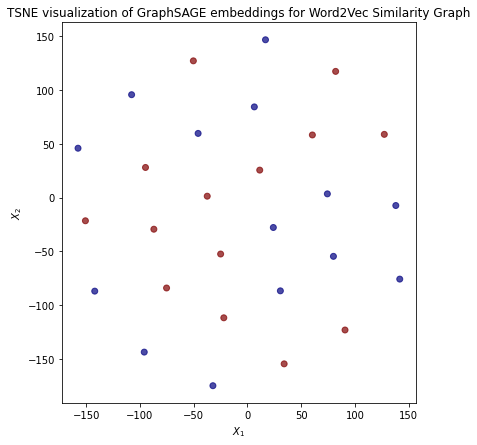

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["label"].astype("category"),
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for Word2Vec Similarity Graph".format(transform.__name__)
)
plt.show()

# Previous Work

In [ ]:


keyword_dict = {} 
keywords = ["netrin", "ephrin", "laminin", "tenascin", "cspg", "zymosan", "camp", "pten", "cntf", "lif", "oncomodulin", "stat3", "socs3", "rhoa", "rock", "y27632", "nogo", "klf", "ngr", "lar", "tlr2", "bdnf", "igf1", "opn", "mag", "omgp", "kspg", "taxol"]
#keywords = ["nucleus"]
for keyword in keywords:
  found_sentences = [] 

  for sentence in all_docs_1D:
    if keyword in sentence:
      found_sentences.append(sentence)

  counter = 0
  for sentence in found_sentences:
    if any(word in sentence for word in causal_verbs):
      # print("-> " + sentence)
      counter += 1

  to_append = [str(int(counter/len(found_sentences) * 100)) + "%", int(counter), int(len(found_sentences))]
  keyword_dict[keyword] = to_append
  print("{} {}/{}: {}".format(keyword, counter, len(found_sentences), counter / len(found_sentences)))

netrin 38/183: 0.20765027322404372
ephrin 72/242: 0.2975206611570248
laminin 189/913: 0.20700985761226726
tenascin 122/511: 0.23874755381604695
cspg 229/869: 0.26352128883774456
zymosan 28/59: 0.4745762711864407
camp 336/1664: 0.20192307692307693
pten 184/660: 0.2787878787878788
cntf 182/517: 0.3520309477756286
lif 899/4896: 0.18361928104575165
oncomodulin 11/47: 0.23404255319148937
stat3 71/255: 0.2784313725490196
socs3 145/352: 0.4119318181818182
rhoa 116/334: 0.3473053892215569
rock 128/697: 0.1836441893830703
y27632 3/4: 0.75
nogo 262/1592: 0.16457286432160803
klf 35/171: 0.2046783625730994
ngr 214/1391: 0.15384615384615385
lar 5285/38353: 0.13779886840664354
tlr2 1/3: 0.3333333333333333
bdnf 310/1027: 0.3018500486854917
igf1 9/55: 0.16363636363636364
opn 32/165: 0.19393939393939394
mag 1108/6690: 0.16562032884902841
omgp 16/132: 0.12121212121212122
kspg 0/5: 0.0
taxol 2/17: 0.11764705882352941


In [ ]:
import pandas as pd 
df = pd.DataFrame(keyword_dict)
df = df.T # flip columns with rows 
df.columns = ["% sentences with causal verb", "sentences with molecule and causal verb", "total sentences with molecule"]

In [ ]:
df

,% sentences with causal verb,sentences with molecule and causal verb,total sentences with molecule
netrin,20%,38,183
ephrin,29%,72,242
laminin,20%,189,913
tenascin,23%,122,511
cspg,26%,229,869
zymosan,47%,28,59
camp,20%,336,1664
pten,27%,184,660
cntf,35%,182,517
lif,18%,899,4896
